21087481_Dương Hoàng Lan Anh

> #### Sử dụng dataset: StudentsPerformance.csv

Import thư viện

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

Đọc dữ liệu từ file csv

In [2]:
df = pd.read_csv('../data/StudentsPerformance.csv')

In [3]:
# Set style for seaborn output
sns.set_style('whitegrid') 

Hiển thị toàn bộ dữ liệu

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## I) CÁC BÀI TOÁN VỀ KIỂM ĐỊNH

### 1. Thực hiện kiểm định trung bình của 1 biến số (định lượng) bằng phương pháp Z-Test bằng một giá trị nào đó với mức sai lầm là 5%. Cho nhận xét

Với One Sample Z-Test:

- Mục đích: Kiểm định trung bình của 1 biến số (định lượng) có bằng một giá trị nào đó hay không

- Xác định giả thuyết H0

- Xác định giả thuyết H1

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha = 0.05

- Quy tắc suy diễn:
    * Nếu p-value < alpha => bác bỏ giả thuyết H0
    * Nếu p-value > alpha => chấp nhận giả thuyết H0

In [5]:
# df_math: Dữ liệu về điểm môn toán của các sinh viên đã hoàn thành khóa luyện thi
df_math = df[df['test preparation course'] == 'completed']['math score']
df_math

1      69
6      88
8      64
13     78
18     46
       ..
990    86
991    65
995    88
997    59
998    68
Name: math score, Length: 358, dtype: int64

In [6]:
# Kiểm tra giá trị trung bình của df_math
df_math.mean()

69.69553072625699

Với One Sample Z-Test:

- Mục đích: Kiểm định trung bình của 1 biến số (định lượng) có bằng một giá trị nào đó hay không

- Xác định giả thuyết H0: Trung bình điểm môn toán của các sinh viên đã hoàn thành khóa luyện thi KHÔNG BẰNG 70

- Xác định giả thuyết H1: Trung bình điểm môn toán của các sinh viên đã hoàn thành khóa luyện thi BẰNG 70

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha = 0.05

- Quy tắc suy diễn:
    * Nếu p-value < alpha => bác bỏ giả thuyết H0
    * Nếu p-value > alpha => chấp nhận giả thuyết H0

In [7]:
# Kiểm tra xem trung bình điểm môn toán của các sinh viên đã hoàn thành khóa luyện thi có bằng 70 hay không bằng phương pháp Z-Test
from statsmodels.stats.weightstats import ztest as ztest
ztest(df_math, value=70)

(-0.3988195888506191, 0.6900261422235778)

**Kết luận:**

- Với mức ý nghĩa alpha = 5%, ta có p-value = 0.69 > 0.05 => p-value > alpha => Chấp nhận giả thuyết H0

- Suy ra đủ dữ kiện để có thể khẳng định rằng trung bình điểm môn toán của các sinh viên đã hoàn thành khóa luyện thi không bằng 70

- Hay nói cách khác, chấp nhận giả thuyết H0 ở mức sai lầm 5%

### 2. Thực hiện kiểm định trung bình của 2 biến số (định lượng) có bằng nhau không bằng phương pháp T-Test với mức sai lầm là 10%. Cho nhận xét

Với Two Sample T-Test:
- Xác định giả thuyết H0

- Xác định giả thuyết H1

- Mặc định mức tin cậy là 90% và mức sai lầm là 10% => mức ý nghĩa alpha = 0.1

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ H0
    * Nếu p-value > alpha thì chấp nhận H0

In [8]:
# df_reading: Dữ liệu về điểm môn đọc của các sinh viên đã hoàn thành khóa luyện thi
df_reading = df[df['test preparation course'] == 'completed']['reading score']
df_reading

1      90
6      95
8      64
13     72
18     42
       ..
990    81
991    82
995    99
997    71
998    78
Name: reading score, Length: 358, dtype: int64

In [9]:
# df_writing: Dữ liệu về điểm môn viết của các sinh viên đã hoàn thành khóa luyện thi
df_writing = df[df['test preparation course'] == 'completed']['writing score']
df_writing

1      88
6      92
8      67
13     70
18     46
       ..
990    75
991    78
995    95
997    65
998    77
Name: writing score, Length: 358, dtype: int64

In [10]:
# Kiểm tra giá trị trung bình của df_reading
df_reading.mean()

73.89385474860335

In [11]:
# Kiểm tra giá trị trung bình của df_writing
df_writing.mean()

74.41899441340782

Với Two Sample T-Test:
- Xác định giả thuyết H0:
Trung bình điểm môn đọc và trung bình điểm môn viết của các sinh viên đã hoàn thành khóa luyện thi KHÔNG BẰNG nhau

- Xác định giả thuyết H1: 
Trung bình điểm môn đọc và trung bình điểm môn viết của các sinh viên đã hoàn thành khóa luyện thi BẰNG nhau

- Mặc định mức tin cậy là 90% và mức sai lầm là 10% => mức ý nghĩa alpha = 0.1

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ H0
    * Nếu p-value > alpha thì chấp nhận H0

In [12]:
# Kiểm tra xem trung bình điểm môn đọc và trung bình điểm môn viết của các sinh viên đã hoàn thành khóa luyện thi có bằng nhau hay không bằng phương pháp T-Test

from scipy import stats
import scipy.stats

stats.ttest_ind(df_reading, df_writing, equal_var=True)

TtestResult(statistic=-0.5201473317338142, pvalue=0.6031221244982492, df=714.0)

**Kết luận:**
* Do alpha = -0.52 và p-value = 0.6 => p-value > alpha => chấp nhận H0

* Suy ra đủ dữ kiện để có thể khẳng định rằng các sinh viên đã hoàn thành khóa luyện thi có trung bình điểm môn đọc và môn viết KHÔNG bằng nhau

* Hay nói cách khác, chấp nhận giả thuyết H0 ở mức sai lầm 10%

### 3. Thực hiện kiểm tra 2 biến định lượng có tương quan với nhau không bằng phương pháp Chi-Square với mức sai lầm là 5%? Cho nhận xét.

Với Chi-Square Test:

- Mục đích: Kiểm tra sự độc lập của 2 biến định tính

- Xác định giả thuyết H0

- Xác định giả thuyết H1

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha = 0.05

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ giả thuyết H0
    * Nếu p-value >= alpha thì chấp nhận giả thuyết H0

In [13]:
'''
Hãy kiểm tra xem có sự phụ thuộc nào giữa giới tính và việc ăn trưa trước khi thi của sinh viên hay không ?
'''

cont_table  = pd.crosstab(df['lunch'], df['gender'])
cont_table

gender,female,male
lunch,,
free/reduced,189,166
standard,329,316


Với Chi-Square Test:

- Mục đích: Kiểm tra sự độc lập của 2 biến định tính

- Xác định giả thuyết H0: 
KHÔNG có sự phụ thuộc giữa giới tính và việc ăn trưa trước khi thi của sinh viên

- Xác định giả thuyết H1:
CÓ sự phụ thuộc giữa giới tính và việc ăn trưa trước khi thi của sinh viên

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha = 0.05

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ giả thuyết H0
    * Nếu p-value >= alpha thì chấp nhận giả thuyết H0

In [14]:
stat, p, dof, expected = scipy.stats.chi2_contingency(cont_table)

# tìm giá trị p-value
alpha = 0.05
print("p-value is: " + str(p))
if p <= alpha:
    print ('Dependent (Reject H0)')
else:
    print ('Independent (H0 holds true)')

p-value is: 0.5420584175146086
Independent (H0 holds true)


**Nhận xét:**
* Không có sự phụ thuộc nào giữa giới tính và việc ăn trưa trước khi thi của sinh viên
* Suy ra có đủ dữ kiện để có thể khẳng định rằng giới tính và việc ăn trưa trước khi thi của sinh viên KHÔNG phụ thuộc nhau
* Kết luận: p-value = 0.542 > 0.05 => p-value > alpha => chấp nhận giả thuyết H0
* Hay nói cách khác, chấp nhận giả thuyết H0 ở mức sai lầm 5%

### 4. Thực hiện kiểm định trung bình của 1 biến số (định lượng) bằng phương pháp T-Test của 1 một thuộc tính nào đó với mức sai lầm là 5%. Cho nhận xét

Với One Sample T-Test:

- Mục đích: Kiểm định trung bình của 1 biến số (định lượng) có bằng một giá trị nào đó hay không

- Xác định giả thuyết H0

- Xác định giả thuyết H1

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha là 5%

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ giả thuyết H0
    * Nếu p-value > alpha thì chấp nhận giả thuyết H0

In [15]:
# df_math: Dữ liệu về điểm môn toán của các sinh viên đã hoàn thành khóa luyện thi
df_math = df[df['test preparation course'] == 'completed']['math score']
df_math

1      69
6      88
8      64
13     78
18     46
       ..
990    86
991    65
995    88
997    59
998    68
Name: math score, Length: 358, dtype: int64

In [16]:
# Kiểm tra giá trị trung bình của df_math
df_math.mean()

69.69553072625699

Với One Sample T-Test:
- Xác định giả thuyết H0:
Trung bình điểm môn toán của các sinh viên đã hoàn thành khóa luyện thi KHÔNG BẰNG 70

- Xác định giả thuyết H1:
Trung bình điểm môn toán của các sinh viên đã hoàn thành khóa luyện thi BẰNG 70

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha là 5%

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ giả thuyết H0
    * Nếu p-value > alpha thì chấp nhận giả thuyết H0

In [17]:
# Kiểm tra xem trung bình điểm môn toán của các sinh viên đã hoàn thành khóa luyện thi có bằng 70 hay không bằng phương pháp T-Test
# Mặc định mức tin cậy là 95% và mức sai lầm là 5%

from scipy import stats
import scipy.stats

stats.ttest_1samp(df_math, popmean=70)

TtestResult(statistic=-0.398819588850619, pvalue=0.6902645830709271, df=357)

**Kết luận:**

* Do alpha = -0.3988 và p-value = 0.69 => p-value > alpha => chấp nhận giả thuyết H0

* Suy ra đủ dữ kiện để có thể khẳng định rằng trung bình điểm môn toán của các sinh viên đã hoàn thành khóa luyện thi KHÔNG BẰNG 70

* Hay nói cách khác, chấp nhận giả thuyết H0 ở mức sai lầm 5%

### 5. Thực hiện kiểm định trung bình của 2 biến số (định lượng) có bằng nhau không bằng phương pháp Z-Test với mức sai lầm là 10%. Cho nhận xét

Với Two Sample Z-Test:
- Xác định giả thuyết H0

- Xác định giả thuyết H1

- Mặc định mức tin cậy là 90% và mức sai lầm là 10% => mức ý nghĩa alpha = 0.1

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ H0
    * Nếu p-value > alpha thì chấp nhận H0

In [18]:
# df_reading: Dữ liệu về điểm môn đọc của các sinh viên đã hoàn thành khóa luyện thi
df_reading = df[df['test preparation course'] == 'completed']['reading score']
df_reading

1      90
6      95
8      64
13     72
18     42
       ..
990    81
991    82
995    99
997    71
998    78
Name: reading score, Length: 358, dtype: int64

In [19]:
# df_writing: Dữ liệu về điểm môn viết của các sinh viên đã hoàn thành khóa luyện thi
df_writing = df[df['test preparation course'] == 'completed']['writing score']
df_writing

1      88
6      92
8      67
13     70
18     46
       ..
990    75
991    78
995    95
997    65
998    77
Name: writing score, Length: 358, dtype: int64

In [20]:
# Kiểm tra giá trị trung bình của df_reading
df_reading.mean()

73.89385474860335

In [21]:
# Kiểm tra giá trị trung bình của df_writing
df_writing.mean()

74.41899441340782

Với Two Sample Z-Test:
- Xác định giả thuyết H0:
Trung bình điểm môn đọc và trung bình điểm môn viết của các sinh viên đã hoàn thành khóa luyện thi KHÔNG BẰNG nhau

- Xác định giả thuyết H1: 
Trung bình điểm môn đọc và trung bình điểm môn viết của các sinh viên đã hoàn thành khóa luyện thi BẰNG nhau

- Mặc định mức tin cậy là 90% và mức sai lầm là 10% => mức ý nghĩa alpha = 0.1

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ H0
    * Nếu p-value > alpha thì chấp nhận H0

In [22]:
# Kiểm tra xem trung bình điểm môn đọc và trung bình điểm môn viết của các sinh viên đã hoàn thành khóa luyện thi có bằng nhau hay không bằng phương pháp Z-Test
from statsmodels.stats.weightstats import ztest as ztest
ztest(df_reading, df_writing, value=0)

(-0.5201473317338142, 0.6029608910155441)

**Kết luận:**

- Với mức ý nghĩa alpha = 10%, ta có p-value = 0.6 > 0.1 => p-value > alpha => Chấp nhận giả thuyết H0

- Suy ra đủ dữ kiện để có thể khẳng định rằng các sinh viên đã hoàn thành khóa luyện thi có trung bình điểm môn đọc và môn viết KHÔNG bằng nhau

- Hay nói cách khác, chấp nhận giả thuyết H0 ở mức sai lầm 10%

### 6. Thực hiện kiểm tra 2 biến định tính có tương quan với nhau không bằng phương pháp Fisher với mức sai lầm là 5%? Cho nhận xét.

Với Fisher Test:

- Mục đích: Kiểm tra sự độc lập của 2 biến định tính dạng nhị phân 2x2

- Xác định giả thuyết H0

- Xác định giả thuyết H1

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha = 0.05

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ giả thuyết H0
    * Nếu p-value >= alpha thì chấp nhận giả thuyết H0

In [23]:
# Kiểm tra xem có sự phụ thuộc nào giữa việc sinh viên đã hoàn thành khóa luyện thi và giới tính của sinh viên đó hay không ?
crosdata = pd.crosstab(df['gender'], [df['test preparation course']], rownames=['gender'], colnames=['test preparation course'])
crosdata

test preparation course,completed,none
gender,,
female,184,334
male,174,308


In [24]:
odd_ratio, p_value = stats.fisher_exact(crosdata)
print('odd ratio is: ' + str(odd_ratio))
print('p-value is: ' + str(p_value))

odd ratio is: 0.9751531419918783
p-value is: 0.8949914298347688


**Nhận xét:**

- Với mức ý nghĩa alpha = 5%, ta có p-value = 0.89499 > alpha = 0.05 => p-value > alpha => Chấp nhận giả thuyết H0

- Suy ra đủ dữ kiện để có thể khẳng định rằng giới tính của sinh viên và việc sinh viên hoàn thành khóa luyện thi không có sự phụ thuộc vào nhau

- Hay nói cách khác, chấp nhận giả thuyết H0 ở mức sai lầm 5%

### 7. Kiểm định ANOVA cho trường hợp biến định lượng trên nhóm định tính

**One Way ANOVA:**

Yêu cầu:
1. Biến định lượng trên nhóm định tính
2. Các biến định lượng trên từng nhóm theo phân phối chuẩn
3. H0: Giá trị trung bình dữ liệu định lượng trên từng nhóm định tính là bằng nhau

In [25]:
# Đổi tên cột

df.rename(columns={
    'parental level of education': 'parental_level_of_education',
    'test preparation course': 'test_preparation_course',
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score'}, 
inplace=True)


In [26]:
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Kiểm định ANOVA 1 chiều:
- Xác định giả thuyết H0:
Điểm môn toán KHÔNG phụ thuộc vào giới tính của sinh viên

- Xác định giả thuyết H1:
Điểm môn toán CÓ phụ thuộc vào giới tính của sinh viên

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha là 5%

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ giả thuyết H0
    * Nếu p-value > alpha thì chấp nhận giả thuyết H0

In [27]:
# Kiểm tra xem điểm môn toán có phụ thuộc vào giới tính của sinh viên hay không ?

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('math_score ~ gender', data=df).fit()

aov_table = sm.stats.anova_lm(model,typ = 1)
aov_table


,df,sum_sq,mean_sq,F,PR(>F)
gender,1.0,6481.373854,6481.373854,28.979336,9.120186e-08
Residual,998.0,223207.705146,223.655015,NaN,NaN


**Nhận xét:**

- Với mức ý nghĩa alpha là 5%, ta có p-value = 	9.120186e-08 > alpha = 0.05 
=> p-value > alpha => Chấp nhận giả thuyết H0

- Suy ra đủ dữ kiện để có thể khẳng định rằng điểm môn toán KHÔNG phụ thuộc vào giới tính của sinh viên

### 8. Kiểm định ANOVA các biến định lượng trên từng nhóm theo phân phối chuẩn

**Two Way ANOVA:**

Yêu cầu:
1. Biến định lượng trên nhóm định tính
2. Các biến định lượng trên từng nhóm theo phân phối chuẩn
3. H0: Trung bình các cột dữ liệu bằng nhau

In [28]:
# Kiểm tra xem điểm toán có phụ thuộc vào loại giới tính của sinh viên trên từng nhóm trình độ học vấn của bố mẹ hay không ?
model = ols('math_score ~ gender + parental_level_of_education + gender:parental_level_of_education', data=df).fit()
result = sm.stats.anova_lm(model,type = 2)

result

,df,sum_sq,mean_sq,F,PR(>F)
gender,1.0,6481.373854,6481.373854,29.896854,5.771736e-08
parental_level_of_education,5.0,7978.273971,1595.654794,7.360331,8.712262e-07
gender:parental_level_of_education,5.0,1039.755355,207.951071,0.959223,4.418181e-01
Residual,988.0,214189.675819,216.791170,NaN,NaN


Kiểm định ANOVA 2 chiều:

- Xác định giả thuyết H0:
Điểm môn toán KHÔNG PHỤ THUỘC VÀO loại giới tính của sinh viên trên từng nhóm trình độ học vấn của bố mẹ

- Xác định giả thuyết H1:
Điểm môn toán CÓ PHỤ THUỘC VÀO loại giới tính của sinh viên trên từng nhóm trình độ học vấn của bố mẹ

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha là 5%

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ giả thuyết H0
    * Nếu p-value > alpha thì chấp nhận giả thuyết H0

**Nhận xét:**
Tất cả đều phụ thuộc. Vì p-value của cả 3 biến đều nhỏ hơn mức ý nghĩa alpha

## II) HỒI QUY TUYẾN TÍNH, PHÂN LỚP, PCA

### 1. Thực hiện hồi quy tuyến tính từ Scikit-learn (dùng hàm LinearRegression()) cho trường hợp 1 biến và 2 biến.

#### **Hồi quy tuyến tính 1 biến sử dụng hàm LinearRegression()**

**Hồi quy tuyến tính 1 biến:**
Hãy cho biết sự ảnh hưởng của điểm môn đọc đến điểm môn viết của sinh viên

1. Xác định biến phụ thuộc và biến độc lập
- Biến phụ thuộc: điểm môn viết
- Biến độc lập: điểm môn đọc

2. Y = f(X) + A0 + A1*X + epsilon

3. Chạy mô hình
4. Đọc và hiểu kết quả

In [38]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()

X = df[['reading_score']]
Y = df['writing_score']

model.fit(X, Y)

'''
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_[0])
print('R-squared:', model.score(X, Y))
'''

print(model.intercept_, model.coef_, model.score(X, Y))

-0.667553640932951 [0.99353111] 0.9112574888913137


**Nhận xét:**

Ta có phương trình cho mô hình hồi quy tuyến tính 1 biến là: 
Y = -0.67 + 0.99 * X

Từ đó suy ra: R^2 = 91.12

Điều này có nghĩa là 91.12% sự thay đổi của Y được giải thích bởi X

#### **Hồi quy tuyến tính 2 biến sử dụng hàm LinearRegression()**

**Hồi quy tuyến tính 2 biến:**
Hãy cho biết sự ảnh hưởng của điểm môn đọc và điểm môn viết đến điểm môn toán của sinh viên

1. Xác định biến phụ thuộc và biến độc lập
- Biến phụ thuộc: điểm môn toán
- Biến độc lập: điểm môn viết điểm môn đọc

2. Y = f(X) + A0 + A1*X + epsilon

3. Chạy mô hình
4. Đọc và hiểu kết quả

In [40]:
from sklearn.linear_model import LinearRegression
import numpy as np

X1 = df[['reading_score']]
X2 = df['writing_score']
Y = df['math_score']

X = pd.concat([X1, X2], axis=1)

model = LinearRegression()
model.fit(X, Y)

'''
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
'''

print(model.intercept_, model.coef_, model.score(X, Y))

7.524092050975732 [0.60128965 0.24942405] 0.6739811351956578


**Nhận xét:**

Ta có phương trình cho mô hình hồi quy tuyến tính 1 biến là: 
Y = 7.524 + 0.6 * X1 + 0.25 * X2

Từ đó suy ra: R^2 = 67.40

Điều này có nghĩa là 67.40% biến thể trong biến phản hồi có thể được giải thích bằng hai biến dự đoán trong mô hình.

### 2.	Thực hiện hồi quy tuyến tính bằng phương pháp StaSmodels (Dùng hàm OLS()) cho trường hợp 1 biến và 2 biến.

#### **Hồi quy tuyến tính 1 biến sử dụng hàm OLS()**

**Hồi quy tuyến tính 1 biến:**

1. Xác định biến phụ thuộc và biến độc lập
- Biến phụ thuộc: điểm môn viết
- Biến độc lập: điểm môn đọc

2. Phương trình hồi quy tuyến tính 1 biến: 
Y = f(X) = A0 + A1 * X + epsilon

3. Chạy mô hình

4. Đọc và hiểu kết quả

**Hồi quy tuyến tính 1 biến:**
Hãy cho biết sự ảnh hưởng của điểm môn đọc đến điểm môn viết của sinh viên

In [41]:
import statsmodels.api as sm

# adding a constant
X_with_constant = sm.add_constant(df[["reading_score"]].values)
Y = df[['writing_score']].values
# performing the regression
result = sm.OLS(Y, X_with_constant).fit()
# Result of statsmodels
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.025e+04
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        07:50:57   Log-Likelihood:                -2928.4
No. Observations:                1000   AIC:                             5861.
Df Residuals:                     998   BIC:                             5871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6676      0.694     -0.962      0.336      -2.029       0.694
x1             0.9935      0.010    101.233      0.000       0.974       1.013
==============================================================================
Omnibus:                        2.031   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                2.094
Skew:                           0.092   Prob(JB):                        0.351
Kurtosis:                       2.871   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Nhận xét:**

- Adj. R-squared = 9%: quá ít, không thể giải thích cho điểm môn đọc. Hay nói cách khác không thể dựa vào điểm môn viết để dự đoán điểm môn đọc

- Prob (F-statistic) = 0.0 => phù hợp, bé hơn 0.05, có ý nghĩa thống kê

- Điểm môn đọc = -0.6676 + 0.9935 * điểm môn viết

- P>|t| = 0.0 < 0.05 => có ý nghĩa thống kê

- Giả sử điểm môn viết = 7 => điểm môn đọc = -0.6676 + 0.9935 * 7 = 6.2869

#### **Hồi quy tuyến tính 2 biến sử dụng hàm OLS()**

In [42]:
import statsmodels.api as sm

# adding a constant
X_with_constant = sm.add_constant(df[["reading_score", "writing_score"]].values)
Y = df[['math_score']].values
# performing the regression
result = sm.OLS(Y, X_with_constant).fit()
# Result of statsmodels
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          2.25e-243
Time:                        07:55:48   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5241      1.328      5.665      0.000       4.918      10.131
x1             0.6013      0.063      9.538      0.000       0.478       0.725
x2             0.2494      0.061      4.118      0.000       0.131       0.368
==============================================================================
Omnibus:                       10.227   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.801
Skew:                           0.006   Prob(JB):                       0.0334
Kurtosis:                       2.596   Cond. No.                         481.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Nhận xét:**

- Adj. R-squared = 1% => quá ít, không thể giải thích cho điểm môn toán. Hay nói cách khác không thể dựa vào điểm môn viết và điểm môn đọc để dự đoán điểm môn toán

- Prob (F-statistic) = 2.25e-243 => phù hợp, bé hơn 0.05, có ý nghĩa thống kê

- P>|t| = 0.0 < 0.05 => có ý nghĩa thống kê

- Ta có phương trình tổng quát cho điểm môn toán là:
math_score = f(reading_score, writing_score)

math_score = A0 + A1 * reading_score + A2 * writing_score * epsilon

math_score = 7.5241 + 0.6013 * reading_score + 0.2494 * writing_score * epsilon

- Giả sử reading_score = 8 và writing_score = 7 

=> math_score = 7.5241 + 0.6013 * 8 + 0.2494 * 7 = 14.0803

### 3. Phân Lớp, Gom Cụm (Clustering)

**Preparing Data Before Modelling**

In [101]:
# Đổi tên cột

df.rename(columns={
    'race/ethnicity': 'ethnicity',
    'parental_level_of_education': 'parent_edu',
    'test_preparation_course': 'test_prep',
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score'}, 
inplace=True)


In [102]:
df

,gender,ethnicity,parent_edu,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Standardized of Numerical Columns

In [90]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns
num_cols = ['math_score', 'reading_score', 'writing_score']

# Standardization
df_std = StandardScaler().fit_transform(df[num_cols])

# Making DataFrame
df_std = pd.DataFrame(data = df_std, index = df.index, columns = num_cols)

In [91]:
# Displaying data contents and 
print('Standardization Result\n')
df_std.head()

Standardization Result



,math_score,reading_score,writing_score
0,0.390024,0.193999,0.391492
1,0.192076,1.427476,1.313269
2,1.577711,1.770109,1.642475
3,-1.259543,-0.833899,-1.583744
4,0.653954,0.605158,0.457333


In [92]:
# Displaying summary statistics
print('Summary Statistics Result\n')
df_std.describe().round(0)

Summary Statistics Result



,math_score,reading_score,writing_score
count,1000.0,1000.0,1000.0
mean,0.0,0.0,-0.0
std,1.0,1.0,1.0
min,-4.0,-4.0,-4.0
25%,-1.0,-1.0,-1.0
50%,-0.0,0.0,0.0
75%,1.0,1.0,1.0
max,2.0,2.0,2.0


Categorical Data Convertion using LabelEncoder

In [103]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['gender', 'ethnicity', 'parent_edu', 'lunch', 'test_prep']

# Making a copy from dataframe
df_encode = df[categorical_cols].copy()

# Doing LabelEncoder for all the categorical columns
for col in categorical_cols:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])
    
# Displaying data
df_encode.head()

,gender,ethnicity,parent_edu,lunch,test_prep
0,0,1,1,1,1
1,0,2,4,1,0
2,0,1,3,1,1
3,1,0,0,0,1
4,1,2,4,1,1


Combining the Data

In [105]:
df_model = df_encode.merge(df_std, left_index = True, right_index = True, how = 'left')
df_model.head()

,gender,ethnicity,parent_edu,lunch,test_prep,math_score,reading_score,writing_score
0,0,1,1,1,1,0.390024,0.193999,0.391492
1,0,2,4,1,0,0.192076,1.427476,1.313269
2,0,1,3,1,1,1.577711,1.770109,1.642475
3,1,0,0,0,1,-1.259543,-0.833899,-1.583744
4,1,2,4,1,1,0.653954,0.605158,0.457333


**Modelling**

Finding the Optimal Number of Clusters

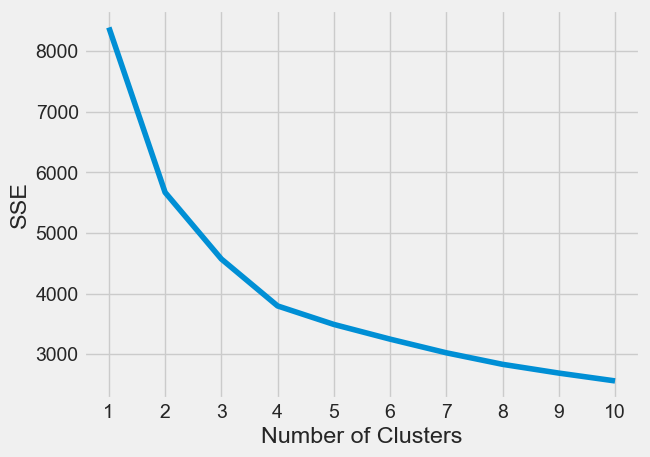

In [110]:
# Chọn số cụm cluster tốt nhất
from sklearn.cluster import KMeans
kmean_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, **kmean_kwargs)
    kmeans.fit(df_model)
    sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [118]:
df_model.head()

,gender,ethnicity,parent_edu,lunch,test_prep,math_score,reading_score,writing_score
0,0,1,1,1,1,0.390024,0.193999,0.391492
1,0,2,4,1,0,0.192076,1.427476,1.313269
2,0,1,3,1,1,1.577711,1.770109,1.642475
3,1,0,0,0,1,-1.259543,-0.833899,-1.583744
4,1,2,4,1,1,0.653954,0.605158,0.457333


In [119]:
# Độ đo Euclid
d = np.sqrt((3.25-6.0)**2 + (3.25-4.0)**2)
d

2.850438562747845

In [120]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(df_model)

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [123]:
# Số tâm
print(kmeans.cluster_centers_)

# Độ đo đánh giá
print(kmeans.inertia_)

# Nhãn
print(kmeans.labels_[:])

# Số lần lặp
print(kmeans.n_iter_)

# Số cụm
print(kmeans.n_clusters)

[[ 0.56410256  1.76495726  1.14529915  0.53418803  0.79059829 -0.80696964
  -0.85761997 -0.87468522]
 [ 0.54726368  1.75621891  4.37810945  0.49253731  0.74129353 -0.82491096
  -0.88674308 -0.88373114]
 [ 0.41444867  2.53231939  4.16730038  0.76425856  0.53612167  0.6271095
   0.68619098  0.69065622]
 [ 0.43377483  2.45695364  0.8013245   0.72847682  0.55298013  0.62817285
   0.65711988  0.66444939]]
3795.9115759373162
[3 2 2 0 2 3 2 1 0 0 0 0 3 2 1 2 3 1 1 0 3 2 1 2 3 2 1 3 3 2 2 1 2 1 2 3 3
 1 3 0 0 3 0 1 0 0 0 3 3 3 1 3 1 3 2 0 3 0 1 1 3 1 0 3 1 1 1 2 0 0 2 1 0 1
 1 0 1 3 2 2 0 0 1 3 0 2 2 3 1 2 3 0 3 0 2 3 1 2 1 3 2 3 3 0 2 1 2 3 0 1 3
 0 0 1 3 3 3 3 1 1 3 3 2 0 2 3 1 2 2 0 2 1 2 2 3 0 1 0 0 2 2 1 1 0 2 1 2 3
 3 3 1 0 0 0 1 2 3 1 3 0 3 2 1 0 2 3 0 2 3 2 3 2 2 3 0 2 0 3 1 2 2 1 0 3 1
 3 3 2 1 3 3 2 1 2 2 0 1 0 1 3 3 2 3 0 1 2 3 3 2 1 2 1 0 0 3 2 3 0 3 1 3 3
 1 2 0 1 2 0 1 2 2 0 3 2 3 3 3 2 1 3 3 3 0 1 2 3 3 0 0 0 1 2 1 2 0 2 3 3 2
 2 2 2 1 3 3 1 3 3 3 2 0 1 0 2 2 3 2 3 2 0 0 0 3 2 1

In [122]:
def euclid (a1, a2, b1, b2):
    return np.sqrt((a1-b1)**2 + (a2-b2)**2)
euclid(3.25, 3.25, 6.0, 4.0)

2.850438562747845

In [124]:
kmeans = KMeans(n_clusters=4).fit(df_model)
df_model['cluster'] = kmeans.labels_[:]
df_model[['cluster', 'math_score', 'reading_score', 'writing_score']].groupby('cluster').mean()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,math_score,reading_score,writing_score
cluster,,,
0,-0.812738,-0.860483,-0.878222
1,-0.824911,-0.886743,-0.883731
2,0.623133,0.649339,0.657022
3,0.627109,0.686191,0.690656


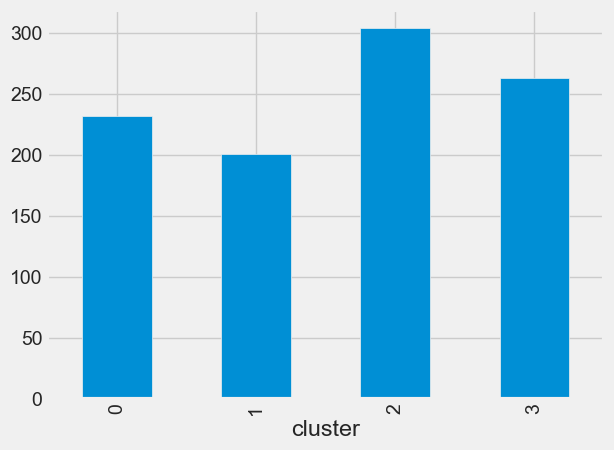

In [125]:
gr_data = df_model.groupby('cluster').size()
gr_data.plot.bar()
plt.show()

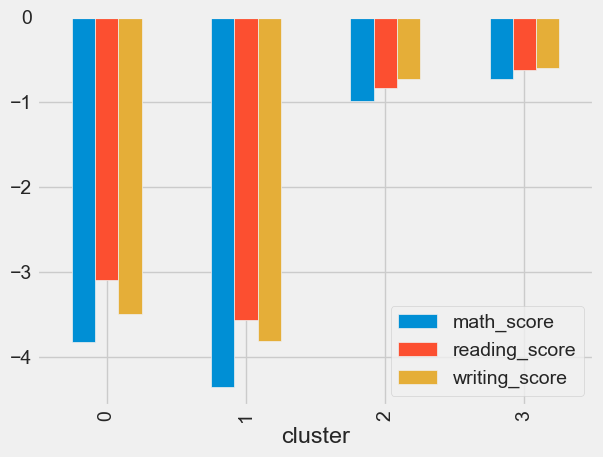

In [128]:
gr_data_min = df_model.groupby('cluster')[['math_score', 'reading_score', 'writing_score']].min()
gr_data_min.plot.bar()
plt.show()

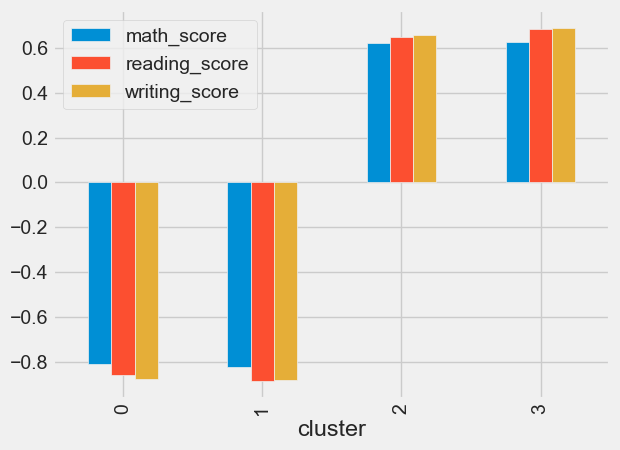

In [129]:
gr_data_mean = df_model.groupby('cluster')[['math_score', 'reading_score', 'writing_score']].mean()
gr_data_mean.plot(kind='bar')
plt.show()

### 4. PCA

In [43]:
from bioinfokit.analys import get_data
df = get_data('gexp').data
df.head()

,A,B,C,D,E,F
0,4.50570,3.260360,-1.249400,8.898070,8.059550,-0.842803
1,3.50856,1.660790,-1.856680,-2.573360,-1.373700,1.196000
2,4.44701,3.411940,-1.040870,10.271195,10.517256,0.272272
3,2.16003,3.146520,0.982809,9.024300,6.058320,-2.967420
4,2.35701,0.452589,-1.910680,12.984239,10.019605,-2.939020


In [45]:
from sklearn.preprocessing import StandardScaler
df_st = StandardScaler().fit_transform(df)
pd.DataFrame(df_st, columns=df.columns).head()

,A,B,C,D,E,F
0,0.619654,0.448280,-0.240867,2.457058,2.304732,-0.331489
1,0.342286,-0.041499,-0.428652,-1.214732,-0.877151,0.474930
2,0.603329,0.494693,-0.176385,2.896569,3.133729,0.109563
3,-0.032825,0.413423,0.449383,2.497462,1.629707,-1.171850
4,0.021968,-0.411444,-0.445350,3.764964,2.965869,-1.160617


In [58]:
from sklearn.decomposition import PCA
pca_out = PCA().fit(df_st)
pca_out.explained_variance_ratio_

array([0.2978742 , 0.27481252, 0.23181442, 0.19291638, 0.00144353,
       0.00113895])

In [59]:
np.cumsum(pca_out.explained_variance_ratio_)

array([0.2978742 , 0.57268672, 0.80450114, 0.99741752, 0.99886105,
       1.        ])

In [52]:
from sklearn.decomposition import PCA

# Khởi tạo đối tượng PCA với số comp = 2
df_pca = PCA(n_components=2)

# Fit vào data
df_pca.fit(df)

# Thực hiện transform
df_transformed = df_pca.transform(df)

# In kết quả
print("Dữ liệu gốc: ", df.shape)
print("Dữ liệu sau PCA: ", df_transformed.shape)

Dữ liệu gốc:  (662, 2)
Dữ liệu sau PCA:  (662, 2)


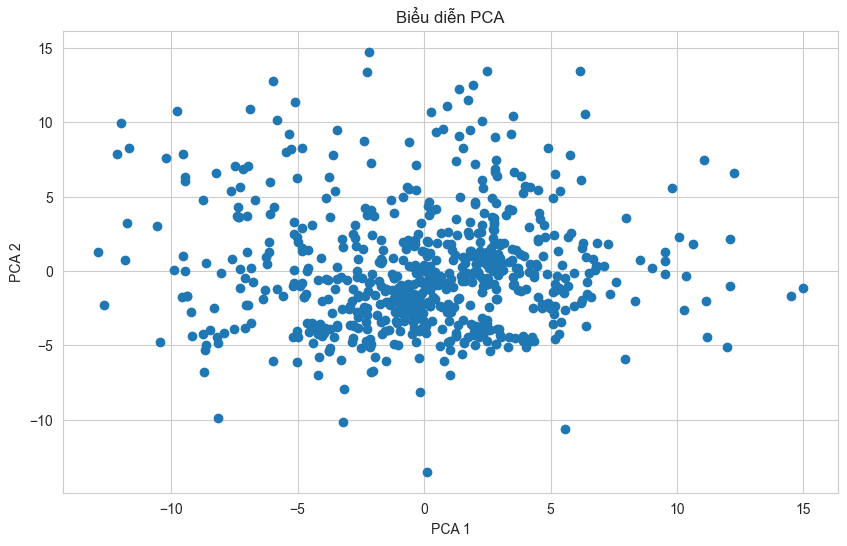

In [54]:
# Vẽ đồ thị để biểu diễn sự trực quan hóa của dữ liệu
plt.figure(figsize=(10, 6))

# Thành phần comp số 1
df_pca_1 = df_transformed[:, 0]

# Thành phần comp số 2
df_pca_2 = df_transformed[:, 1]

# Vẽ đồ thị
plt.scatter(df_pca_1, df_pca_2)

# Đặt tên cho trục x
plt.xlabel('PCA 1')

# Đặt tên cho trục y
plt.ylabel('PCA 2')

# Đặt tiêu đề cho đồ thị
plt.title('Biểu diễn PCA')

# Hiển thị đồ thị
plt.show()